# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool


In [5]:
! wget -O vwap_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' vwap_crossover.py

--2024-01-13 22:32:57--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2544 (2.5K) [text/plain]
Saving to: ‘vwap_crossover.py’

vwap_crossover.py   100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-01-13 22:32:57 (36.4 MB/s) - ‘vwap_crossover.py’ saved [2544/2544]



In [6]:
from vwap_crossover import VWAPCrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 139788,
 'strategyId': '0ca2ee5dd53b45ce98c64563fa7755d9'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('ITC', exchange='NSE')
instrument

[{'id': 32, 'value': 'NSE:ITC'},
 {'id': 1674232, 'value': 'NSE:ITC.AF'},
 {'id': 1674277, 'value': 'NSE:ITC.BL'},
 {'id': 2552289, 'value': 'NSE:ITC.RL'},
 {'id': 243469, 'value': 'NSE:KILITCH'},
 {'id': 86929, 'value': 'NSE:KILITCH.BE'},
 {'id': 1921593, 'value': 'NSE:MITCON'},
 {'id': 1918840, 'value': 'NSE:MITCON.BE'},
 {'id': 1918841, 'value': 'NSE:MITCON.BL'},
 {'id': 1918842, 'value': 'NSE:MITCON.IQ'}]

## Setup Parameters

In [10]:
parameters = {
    'TIME_PERIOD': 7
}

In [11]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:ITC', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'VWAP Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ VWAP Crossover            │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:ITC']               │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 15                        │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 7}        │
├─────────────────────────┼──────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2024-01-13 22:37:09] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-13 22:37:10] Sanity checks on cfg successful.
[2024-01-13 22:37:10] Currency set to "INR"
[2024-01-13 22:37:10] Setting up broker connection...
[2024-01-13 22:37:12] Broker connection has been setup successfully.
[2024-01-13 22:37:12] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2024-01-13 22:37:12] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-13 22:37:12] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-13 22:37:12] Reading strategy...
[2024-01-13 22:37:13] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE                      ITC 2021-08-02 10:15:00+05:30   
1                  NSE                      ITC 2021-08-02 12:15:00+05:30   
2                  NSE                      ITC 2021-08-02 14:15:00+05:30   
3                  NSE                      ITC 2021-08-03 13:15:00+05:30   
4                  NSE                      ITC 2021-08-03 14:15:00+05:30   
5                  NSE                      ITC 2021-08-04 10:15:00+05:30   
6                  NSE                      ITC 2021-08-05 10:15:00+05:30   
7                  NSE                      ITC 2021-08-06 10:15:00+05:30   
8                  NSE                      ITC 2021-08-06 12:15:00+05:30   
9                  NSE                      ITC 2021-08-06 13:15:00+05:30   
10                 NSE                      ITC 2021-08-09 09:15:00+05:30   
11                 NSE                      ITC 2021-08-09 10:15:00+05:30   
12                 NSE                      ITC 2021-08-11 12:15:00+05:30   
13                 NSE                      ITC 2021-08-12 10:15:00+05:30   
14                 NSE                      ITC 2021-08-13 10:15:00+05:30   
15                 NSE                      ITC 2021-08-16 09:15:00+05:30   
16                 NSE                      ITC 2021-08-16 10:15:00+05:30   
17                 NSE                      ITC 2021-08-16 11:15:00+05:30   
18                 NSE                      ITC 2021-08-18 11:15:00+05:30   
19                 NSE                      ITC 2021-08-18 12:15:00+05:30   
20                 NSE                      ITC 2021-08-20 14:15:00+05:30   
21                 NSE                      ITC 2021-08-23 09:15:00+05:30   
22                 NSE                      ITC 2021-08-24 14:15:00+05:30   
23                 NSE                      ITC 2021-08-25 09:15:00+05:30   
24                 NSE                      ITC 2021-08-25 10:15:00+05:30   
25                 NSE                      ITC 2021-08-25 14:15:00+05:30   
26                 NSE                      ITC 2021-08-26 11:15:00+05:30   
27                 NSE                      ITC 2021-08-26 12:15:00+05:30   
28                 NSE                      ITC 2021-08-27 10:15:00+05:30   
29                 NSE                      ITC 2021-08-27 11:15:00+05:30   
30                 NSE                      ITC 2021-08-27 12:15:00+05:30   
31                 NSE                      ITC 2021-08-27 13:15:00+05:30   
32                 NSE                      ITC 2021-08-30 12:15:00+05:30   
33                 NSE                      ITC 2021-09-01 10:15:00+05:30   
34                 NSE                      ITC 2021-09-02 10:15:00+05:30   
35                 NSE                      ITC 2021-09-02 12:15:00+05:30   
36                 NSE                      ITC 2021-09-03 10:15:00+05:30   
37                 NSE                      ITC 2021-09-03 11:15:00+05:30   
38                 NSE                      ITC 2021-09-03 12:15:00+05:30   
39                 NSE                      ITC 2021-09-03 13:15:00+05:30   
40                 NSE                      ITC 2021-09-07 10:15:00+05:30   
41                 NSE                      ITC 2021-09-07 15:15:00+05:30   
42                 NSE                      ITC 2021-09-08 12:15:00+05:30   
43                 NSE                      ITC 2021-09-08 13:15:00+05:30   
44                 NSE                      ITC 2021-09-09 10:15:00+05:30   
45                 NSE                      ITC 2021-09-09 15:15:00+05:30   
46                 NSE                      ITC 2021-09-13 09:15:00+05:30   
47                 NSE                      ITC 2021-09-13 10:15:00+05:30   
48                 NSE                      ITC 2021-09-13 11:15:00+05:30   
49                 NSE                      ITC 2021-09-14 13:15:00+05:30   
50                 NSE                      ITC 2021-09-15 09:15:00+05:30   


### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-06-30
Risk-Free Rate      0.0%
Time in Market      88.0%

Cumulative Return   -3.96%
CAGR﹪              -2.09%

Sharpe              -0.13
Prob. Sharpe Ratio  40.18%
Sortino             -0.19
Sortino/√2          -0.14
Omega               0.97

Max Drawdown        -19.27%
Longest DD Days     484

Gain/Pain Ratio     -0.04
Gain/Pain (1M)      -0.12

Payoff Ratio        1.59
Profit Factor       0.97
Common Sense Ratio  1.29
CPC Index           0.59
Tail Ratio          1.33
Outlier Win Ratio   5.21
Outlier Loss Ratio  3.24

MTD                 -1.18%
3M                  3.79%
6M                  -6.76%
YTD                 -6.84%
1Y                  -7.48%
3Y (ann.)           -2.09%
5Y (ann.)           -2.09%
10Y (ann.)          -2.09%
All-time (ann.)     -2.09%

Avg. Drawdown       -1.87%
Avg. Drawdown Days  36
Recovery Factor     -0.21
Ulcer Index         0.08
Serenity Index 

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-06-30
Risk-Free Rate             0.0%
Time in Market             88.0%

Cumulative Return          -3.96%
CAGR﹪                     -2.09%

Sharpe                     -0.13
Prob. Sharpe Ratio         40.18%
Smart Sharpe               -0.12
Sortino                    -0.19
Smart Sortino              -0.17
Sortino/√2                 -0.14
Smart Sortino/√2           -0.12
Omega                      0.97

Max Drawdown               -19.27%
Longest DD Days            484
Volatility (ann.)          6.93%
Calmar                     -0.11
Skew                       -1.27
Kurtosis                   29.76

Expected Daily %           -0.0%
Expected Monthly %         -0.18%
Expected Yearly %          -1.34%
Kelly Criterion            -1.06%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.72%
Expected Shortfall (cVaR)  -0.72%

Max Consecutive 

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-03-02  2023-02-22  2023-06-30   484    -19.271824        -18.139895
2  2021-09-02  2021-09-16  2021-10-22    50     -4.262078         -4.063111
3  2022-01-04  2022-01-25  2022-02-15    42     -2.868199         -2.663328
4  2021-10-25  2021-10-29  2021-11-08    14     -1.745888         -1.296348
5  2021-12-10  2021-12-13  2021-12-23    12     -1.238045         -1.208568

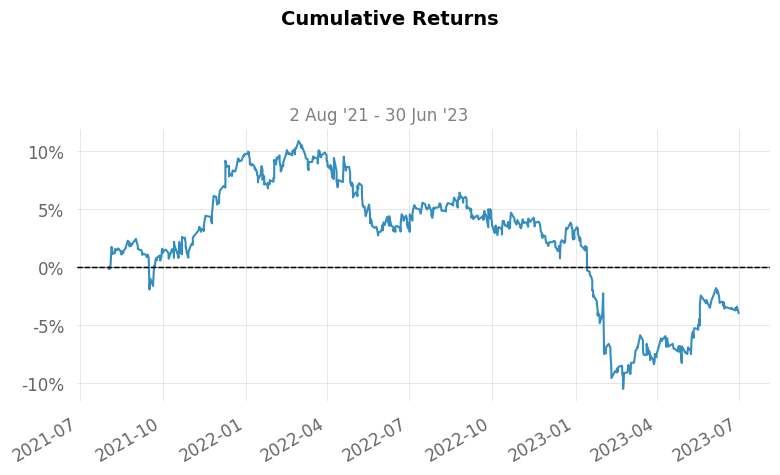

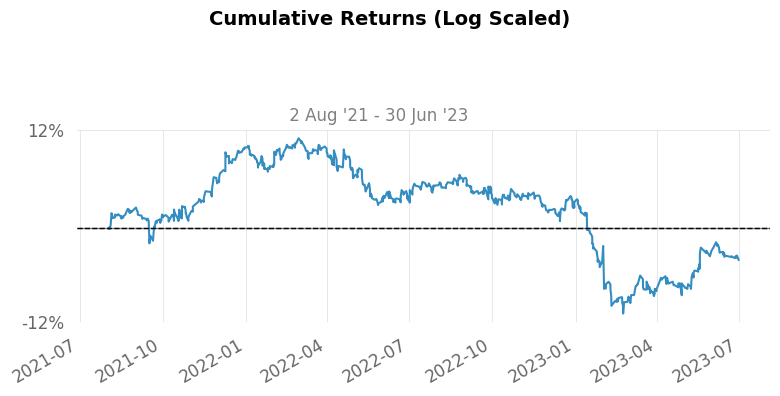

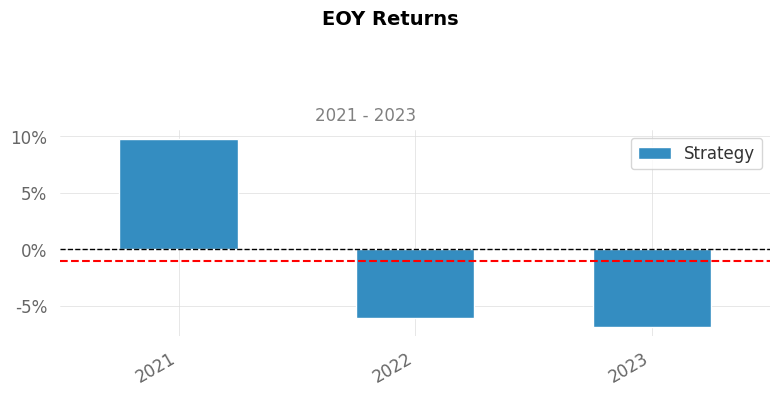

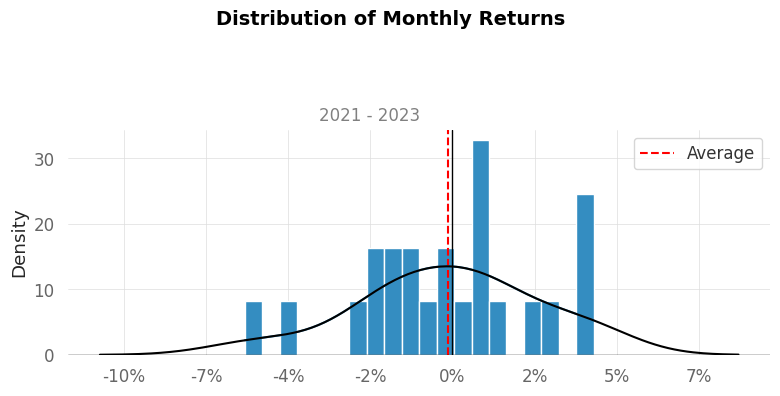

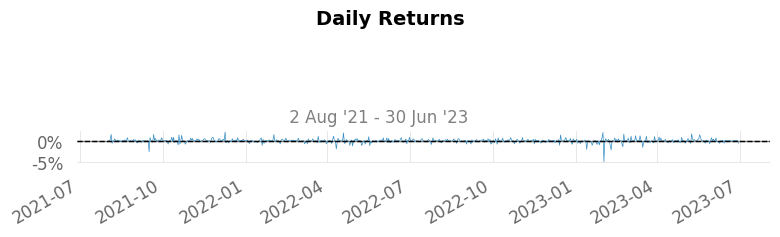

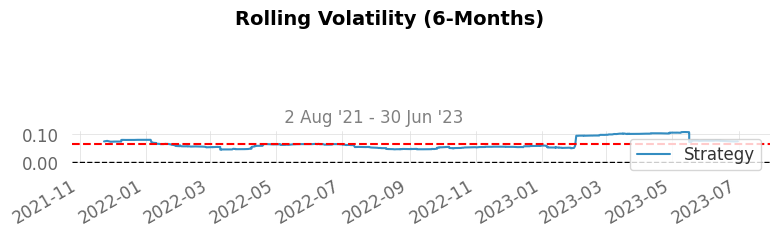

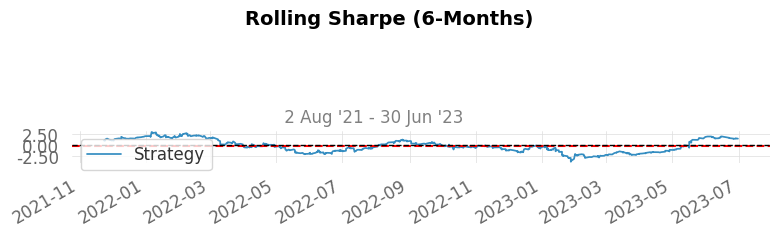

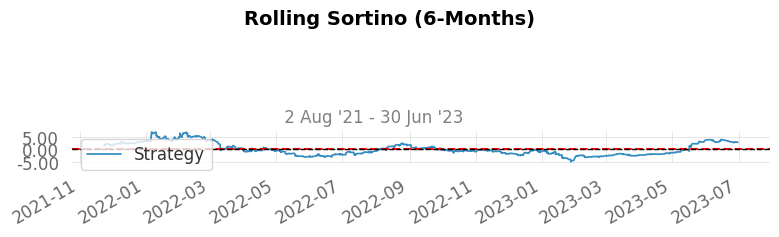

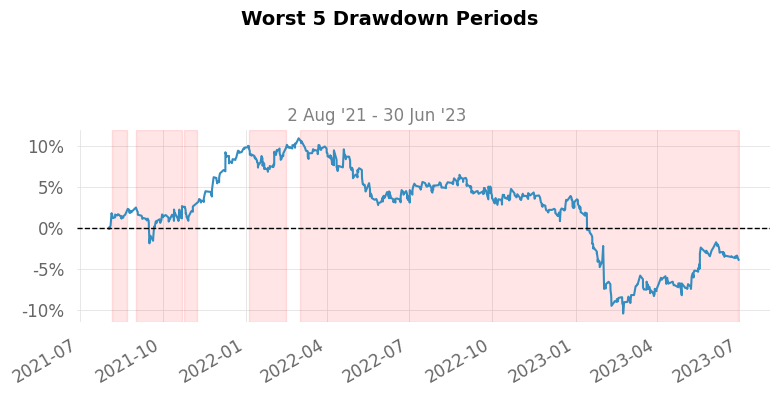

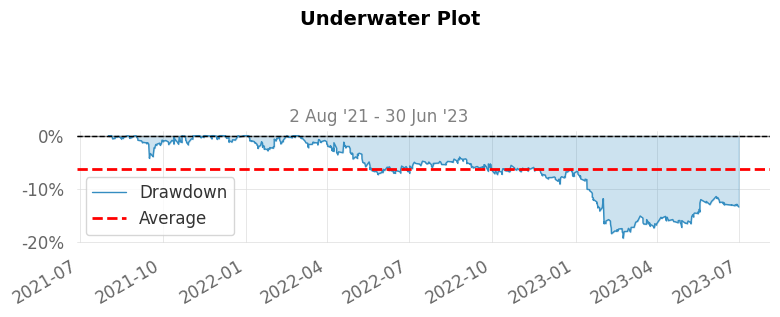

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


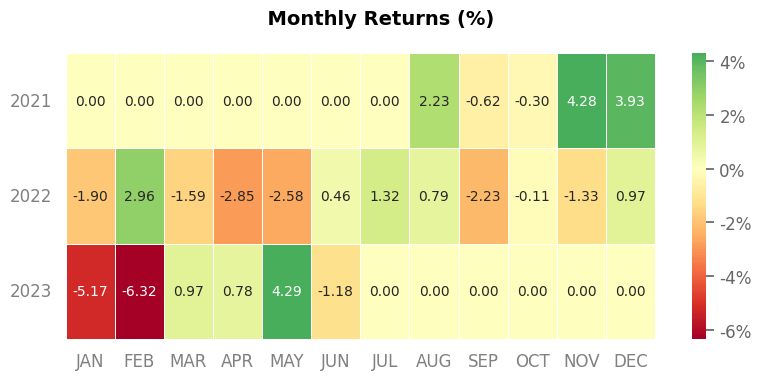

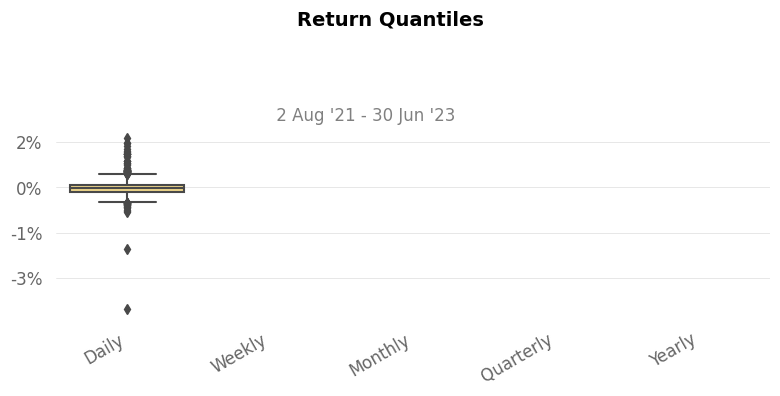

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | c2ac6b2928564c59b76c63387009daf8 |
| Transaction Type | BUY                              |
| Instrument       | NSE:ITC                          |
| Quantity         | 15                               |
| Price            | ₹450.45                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-13T17:16:21.203641Z | COMPLETE               |
| 2024-01-13T17:16:21.203624Z | OPEN                   |
| 2024-01-13T17:16:21.203606Z | OPEN PENDING           |
| 2024-01-13T17:16:21.203587Z | VALIDATION PENDING     |
| 2024-01-13T17:16:21.203548Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | f51a04ed589342ac9

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---